In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from konlpy.tag import Okt
from collections import Counter
from tqdm import tqdm_notebook, tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

df = pd.read_csv('Trend_data.csv')

In [99]:
df.head(5)

,title,published_at,channel_title,trending_date,tags,view_count,likes,dislikes,comment_count,comments,ratings,category
0,안녕하세요 보겸입니다,2020-08-09,보겸 BK,2020-08-12,보겸|bokyem,5947503,53326,105756,139946,0,0,Entertainment
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12,총몇명,2020-08-12,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,0,0,Film & Animation
2,평생 반성하면서 살겠습니다.,2020-08-10,양팡 YangPang,2020-08-12,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,0,0,People & Blogs
3,안녕하세요 꽈뚜룹입니다.,2020-08-11,꽈뚜룹 Quaddurup,2020-08-12,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,0,0,Entertainment
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11,JYP Entertainment,2020-08-12,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,0,0,Music


In [100]:
# outlier --> category 29번으로 분류
category_out = df.loc[df['category'].isna(), 
             ['title', 'channel_title', 'trending_date', 'tags']]
# 중복 값 제거
category_out.drop_duplicates(subset=['title', 'trending_date'], keep='last',
                            ignore_index=True, inplace=True)

In [101]:
category_out

,title,channel_title,trending_date,tags
0,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],행정안전부,2020-08-12,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...
1,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],행정안전부,2020-08-13,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...
2,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],행정안전부,2020-08-14,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...
3,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],행정안전부,2020-08-15,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...
4,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],행정안전부,2020-08-16,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...
...,...,...,...,...
282,충주시 행사 근황,충주시,2023-03-04,충주|충주시|공무원|홍보맨|투자유치|삼성전자|화성캠퍼스|반도체|EUV|기공식|현수막...
283,충주시 행사 근황,충주시,2023-03-05,충주|충주시|공무원|홍보맨|투자유치|삼성전자|화성캠퍼스|반도체|EUV|기공식|현수막...
284,충주시 행사 근황,충주시,2023-03-06,충주|충주시|공무원|홍보맨|투자유치|삼성전자|화성캠퍼스|반도체|EUV|기공식|현수막...
285,30만 구독자 감사합니다ㅣ겸손맨의 낮은 자세 토크#3,충주시,2023-03-22,충주|충주시|공무원|홍보맨|김선태|30만|구독자|기념|감사합니다|감사 영상|눕방|겸손맨


In [102]:
okt = Okt()

noun = []
count = []
n_list = []


# noun에 명사 분석을 대입
for i in tqdm(range(len(category_out))):
    noun.append(okt.nouns(category_out['tags'][i]))
    
for j in tqdm(range(len(category_out))):
    count.append(Counter(noun[j]))
    
for k in tqdm(range(len(category_out))): 
    n_list.append(count[k].most_common(3))
    

100%|██████████| 287/287 [00:00<00:00, 44417.74it/s]


In [103]:
with open('category29.txt', 'w', encoding='UTF-8') as f:
    for i in n_list:
        f.write(str(i))

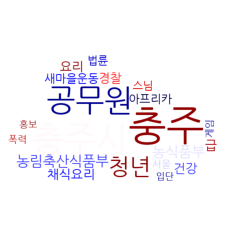

In [106]:
# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('category29.txt').read()


okt = Okt()

# okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(20) 

# 워드 클라우드 마스크 설정
icon = Image.open('image.png')
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255, 255, 255))
mask.paste(icon, icon)
mask = np.array(mask)

# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(width=1000, height=1000, 
               background_color="white", 
               random_state=0, 
               font_path='/home/joom/Documents/font/NanumGothic',
               colormap = 'seismic',
               mask = mask)

cloud = wc.generate_from_frequencies(dict(tags))


plt.imshow(cloud)
plt.axis("off")
plt.show()

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('category29.jpg')
